In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from dateutil import parser
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
# Store filepath in a variable
file_one = Path("Resources\historical-property-sales-data.csv")

In [3]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
properties_original_df = pd.read_csv(file_one, encoding="ISO-8859-1")
properties_original_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,862416.0,Commercial,5370701000,115 W OKLAHOMA AV,NaN,14.0,6440.0,Fast Food Operation,Alum/Vynyl Siding,1.0,2000.0,NaN,"3,229",1,NaN,0.0,0.0,"1,703,065,320",12/23/2020,"$2,150,000"
1,862062.0,Commercial,6269997114,151 W LAYTON AV,NaN,13.0,6440.0,Fast Food Operation,Concrete Block,1.0,1968.0,NaN,"1,980",1,NaN,0.0,0.0,"457,380,000",12/23/2020,"$1,200,000"
2,870290.0,Commercial,330432000,9050-9100 N SWAN RD,NaN,9.0,6202.0,Day Care Center,NaN,1.0,2000.0,NaN,"34,100",1,NaN,0.0,0.0,"2,238,984",5/7/2021,"$1,500,000"
3,98508.0,Residential,49980110,9327 N SWAN RD,NaN,9.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,1341648,2022-01-07,800000
4,NaN,Vacant Land,369999400,9201R N 107TH ST,NaN,9.0,6411.0,Commercial Land,NaN,0.0,0.0,0.0,0,1,0.0,0.0,0.0,1090307,2015-11-01,790000


In [4]:
properties_original_df.columns

Index(['ï»¿PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject',
       'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price'],
      dtype='object')

In [5]:
properties_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56048 entries, 0 to 56047
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿PropertyID  32048 non-null  float64
 1   PropType       56040 non-null  object 
 2   taxkey         56048 non-null  int64  
 3   Address        56044 non-null  object 
 4   CondoProject   9142 non-null   object 
 5   District       56046 non-null  float64
 6   nbhd           55991 non-null  float64
 7   Style          55957 non-null  object 
 8   Extwall        45621 non-null  object 
 9   Stories        55879 non-null  float64
 10  Year_Built     55987 non-null  float64
 11  Rooms          54418 non-null  float64
 12  FinishedSqft   55947 non-null  object 
 13  Units          56048 non-null  int64  
 14  Bdrms          54419 non-null  float64
 15  Fbath          55393 non-null  float64
 16  Hbath          51208 non-null  float64
 17  Lotsize        56048 non-null  object 
 18  Sale_d

In [6]:
#getting only 'Residential' values
residential_properties_df = properties_original_df.loc[properties_original_df["PropType"] == 'Residential']
residential_properties_df = residential_properties_df.drop(columns=['CondoProject', 'ï»¿PropertyID','PropType','District','Extwall','nbhd','Stories','taxkey','Address','Rooms','Year_Built','Units'], axis=1)
residential_properties_df.isnull().sum()

Style             87
FinishedSqft      90
Bdrms            128
Fbath             10
Hbath           3610
Lotsize            0
Sale_date          0
Sale_price         8
dtype: int64

In [7]:
styles_list = ['Cape Cod','Colonial','Bi-Level','Duplex N/S','Townhouse','Dplx Bungalow','Milwaukee Bungalow','Split Level','Res O/S A & 1/2','Res O/S 2sty +','Res O/S 1 Story','Duplex O/S','Triplex','Tudor','Contemporary','Mansion','Rm or Rooming House']
filtered_residential_properties_df = residential_properties_df[residential_properties_df['Style'].isin(styles_list)]
filtered_residential_properties_df = filtered_residential_properties_df.drop('Style', axis=1)
filtered_residential_properties_df

,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
80,3328,3.0,3.0,1.0,219978,2022-08-18,2500000
81,3328,3.0,3.0,1.0,219978,2017-08-01,1391000
83,1120,2.0,1.0,NaN,218163,6/24/2019,167500
144,"2,200",4.0,2.0,0.0,"128,502",11/23/2021,"$336,000"
179,"1,125",2.0,1.0,1.0,"101,059",10/8/2021,"$250,000"
...,...,...,...,...,...,...,...
55938,907,3.0,1.0,0.0,0,2018-11-01,51100
56000,1438,2.0,2.0,0.0,0,2018-12-01,198000
56001,2310,4.0,2.0,0.0,0,2018-12-01,180000
56002,560,3.0,1.0,0.0,0,2018-12-01,103000


In [8]:
#check datatype of each column
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26800 entries, 80 to 56003
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FinishedSqft  26800 non-null  object 
 1   Bdrms         26769 non-null  float64
 2   Fbath         26796 non-null  float64
 3   Hbath         24705 non-null  float64
 4   Lotsize       26800 non-null  object 
 5   Sale_date     26800 non-null  object 
 6   Sale_price    26795 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.6+ MB


In [9]:
filtered_residential_properties_df['Baths_total'] = filtered_residential_properties_df['Fbath'] + filtered_residential_properties_df['Hbath']
filtered_residential_properties_df = filtered_residential_properties_df.drop(columns=['Fbath','Hbath'], axis=1)
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26800 entries, 80 to 56003
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FinishedSqft  26800 non-null  object 
 1   Bdrms         26769 non-null  float64
 2   Lotsize       26800 non-null  object 
 3   Sale_date     26800 non-null  object 
 4   Sale_price    26795 non-null  object 
 5   Baths_total   24703 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [10]:
filtered_residential_properties_df['Sale_date'] = pd.to_datetime(filtered_residential_properties_df['Sale_date'], infer_datetime_format=True, format='mixed')
filtered_residential_properties_df['Year'] = filtered_residential_properties_df['Sale_date'].dt.year
filtered_residential_properties_df['Month'] = filtered_residential_properties_df['Sale_date'].dt.month
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26800 entries, 80 to 56003
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FinishedSqft  26800 non-null  object        
 1   Bdrms         26769 non-null  float64       
 2   Lotsize       26800 non-null  object        
 3   Sale_date     26800 non-null  datetime64[ns]
 4   Sale_price    26795 non-null  object        
 5   Baths_total   24703 non-null  float64       
 6   Year          26800 non-null  int32         
 7   Month         26800 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 1.6+ MB


C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_12856\3724813437.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  filtered_residential_properties_df['Sale_date'] = pd.to_datetime(filtered_residential_properties_df['Sale_date'], infer_datetime_format=True, format='mixed')


In [11]:
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['Bdrms','Baths_total','Lotsize'])
filtered_residential_properties_df.isnull().sum()

FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Year            0
Month           0
dtype: int64

In [12]:
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].astype(str)
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace('$', '')
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace(',', '')
filtered_residential_properties_df['Sale_price'] = pd.to_numeric(filtered_residential_properties_df['Sale_price']).astype(int)

filtered_residential_properties_df['Bdrms'] = pd.to_numeric(filtered_residential_properties_df['Bdrms']).astype(int)
filtered_residential_properties_df['Baths_total'] = pd.to_numeric(filtered_residential_properties_df['Baths_total']).astype(int)


filtered_residential_properties_df['FinishedSqft'] = filtered_residential_properties_df['FinishedSqft'].str.replace(',', '')
filtered_residential_properties_df['FinishedSqft'] = pd.to_numeric(filtered_residential_properties_df['FinishedSqft']).astype(int, errors='ignore')

filtered_residential_properties_df['Lotsize'] = filtered_residential_properties_df['Lotsize'].str.replace(',', '')
filtered_residential_properties_df['Lotsize'] = pd.to_numeric(filtered_residential_properties_df['Lotsize']).astype(int, errors='ignore')

In [13]:
filtered_residential_properties_df.isnull().sum()

FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Year            0
Month           0
dtype: int64

In [14]:
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['FinishedSqft','Lotsize'])
filtered_residential_properties_df.isnull().sum()

FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Year            0
Month           0
dtype: int64

In [15]:
filtered_residential_properties_df['FinishedSqft'] = pd.to_numeric(filtered_residential_properties_df['FinishedSqft']).astype(int)
filtered_residential_properties_df['Lotsize'] = pd.to_numeric(filtered_residential_properties_df['Lotsize']).astype(int)
filtered_residential_properties_df = filtered_residential_properties_df[['Bdrms','Baths_total', 'FinishedSqft', 'Lotsize', 'Sale_date','Year', 'Month', 'Sale_price']]
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24674 entries, 80 to 56003
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Bdrms         24674 non-null  int32         
 1   Baths_total   24674 non-null  int32         
 2   FinishedSqft  24674 non-null  int32         
 3   Lotsize       24674 non-null  int32         
 4   Sale_date     24674 non-null  datetime64[ns]
 5   Year          24674 non-null  int32         
 6   Month         24674 non-null  int32         
 7   Sale_price    24674 non-null  int32         
dtypes: datetime64[ns](1), int32(7)
memory usage: 1.0 MB


In [16]:
# replace '$' sign from some Sale_price values
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['Sale_price'])

filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].astype(str)
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace('$', '')
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace(',', '')
filtered_residential_properties_df['Sale_price'] = pd.to_numeric(filtered_residential_properties_df['Sale_price']).astype(int)
filtered_residential_properties_df.head()

,Bdrms,Baths_total,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
80,3,4,3328,219978,2022-08-18,2022,8,2500000
81,3,4,3328,219978,2017-08-01,2017,8,1391000
144,4,2,2200,128502,2021-11-23,2021,11,336000
179,2,2,1125,101059,2021-10-08,2021,10,250000
191,4,1,1471,95832,2022-08-12,2022,8,274900


In [17]:
filtered_residential_properties_df.to_csv("Resources\cleaned-property-sales-data.csv", encoding='utf-8',index=False)

REMOVING UPPER RANGE DUE TO HIGH PRICE PREDICTIONS

In [18]:
#try to find outliers
filtered_residential_properties_df.describe()[['Sale_price']]

,Sale_price
count,2.467400e+04
mean,1.737497e+05
min,0.000000e+00
25%,1.100000e+05
50%,1.559000e+05
75%,2.170000e+05
max,2.500000e+06
std,1.102176e+05


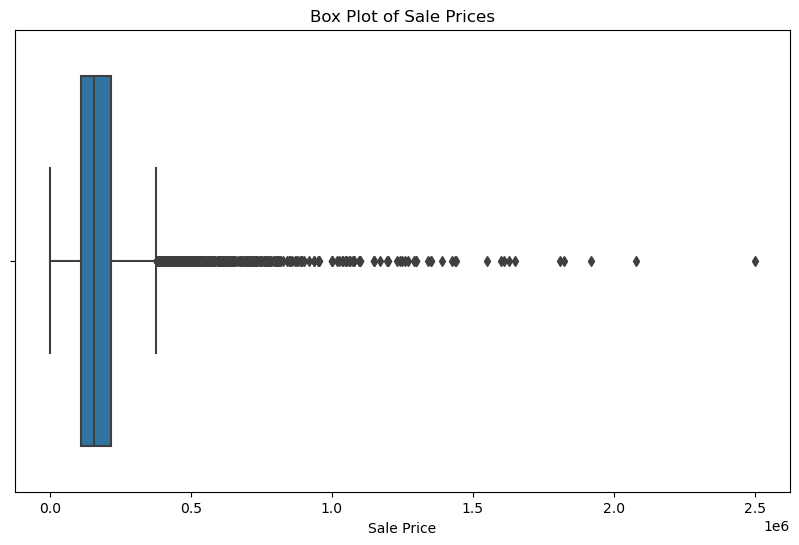

In [19]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_residential_properties_df['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_residential_properties_df['Sale_price'].quantile(0.25)
Q3 = filtered_residential_properties_df['Sale_price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = filtered_residential_properties_df[(filtered_residential_properties_df['Sale_price'] <= upper_bound)]


# Display the DataFrame without outliers
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23878 entries, 144 to 56003
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Bdrms         23878 non-null  int32         
 1   Baths_total   23878 non-null  int32         
 2   FinishedSqft  23878 non-null  int32         
 3   Lotsize       23878 non-null  int32         
 4   Sale_date     23878 non-null  datetime64[ns]
 5   Year          23878 non-null  int32         
 6   Month         23878 non-null  int32         
 7   Sale_price    23878 non-null  int32         
dtypes: datetime64[ns](1), int32(7)
memory usage: 1.0 MB


In [24]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23878 entries, 144 to 56003
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Bdrms         23878 non-null  int32         
 1   Baths_total   23878 non-null  int32         
 2   FinishedSqft  23878 non-null  int32         
 3   Lotsize       23878 non-null  int32         
 4   Sale_date     23878 non-null  datetime64[ns]
 5   Year          23878 non-null  int32         
 6   Month         23878 non-null  int32         
 7   Sale_price    23878 non-null  int32         
dtypes: datetime64[ns](1), int32(7)
memory usage: 1.0 MB


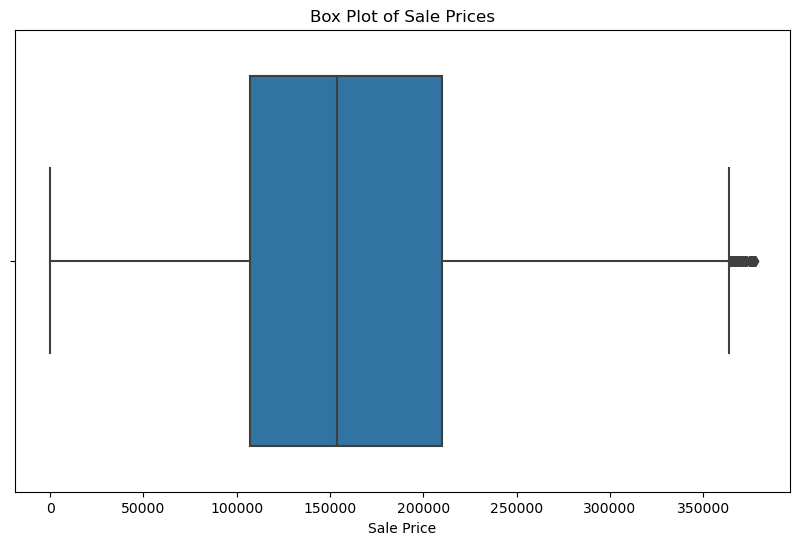

In [21]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [27]:
df_no_outliers.to_csv("Resources\cleaned-property-sales-data_no-outliers.csv")